In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# The below code should be used with caution. It will suppress all warnings in the notebook.
# It should only be added once your notebook is complete and you are willing to accept the risk of not seeing any warnings.
import warnings
warnings.filterwarnings('ignore')

## Load data

In this workshop we will be using a dataset which records different chemical aspects of red wine to predict its quality. 

In [2]:
# It is sometimes difficult for apprentices to figure out where their notebook and data are located.
# This helps:
# import os
# print(os.getcwd())

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# An important point about units: Ideally the metadata should tell you what units the data are in.
# Unfortunately, this is not true here. 
# We cannot therefore assume that the coefficients that we obtain from our linear regression are directly comparable with each other.

## Activity: EDA

As we saw in Activate, a model is only as good as the data it is built upon which means as analysts we need to devote significant time to exploring our data.

In [6]:
# 1: Investigate the quality column. What are the most common quality types? 
# How many of each type are there?
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
# None are rated 1 or 2, so we can assume that 3 is the lowest rating
# and 8 is the highest rating

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
# How might this affect our result?


In [10]:
#2: Inspect the data for duplicates, null values and outliers. If you find any, deal with them as you see fit.

In [11]:
#2: Inspect the data for duplicates.
print(df.duplicated().sum())
# Remove duplicates
df = df.drop_duplicates()
# Check that duplicates have been removed
print(df.duplicated().sum())

240
0


In [12]:
#2: Inspect the data for nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

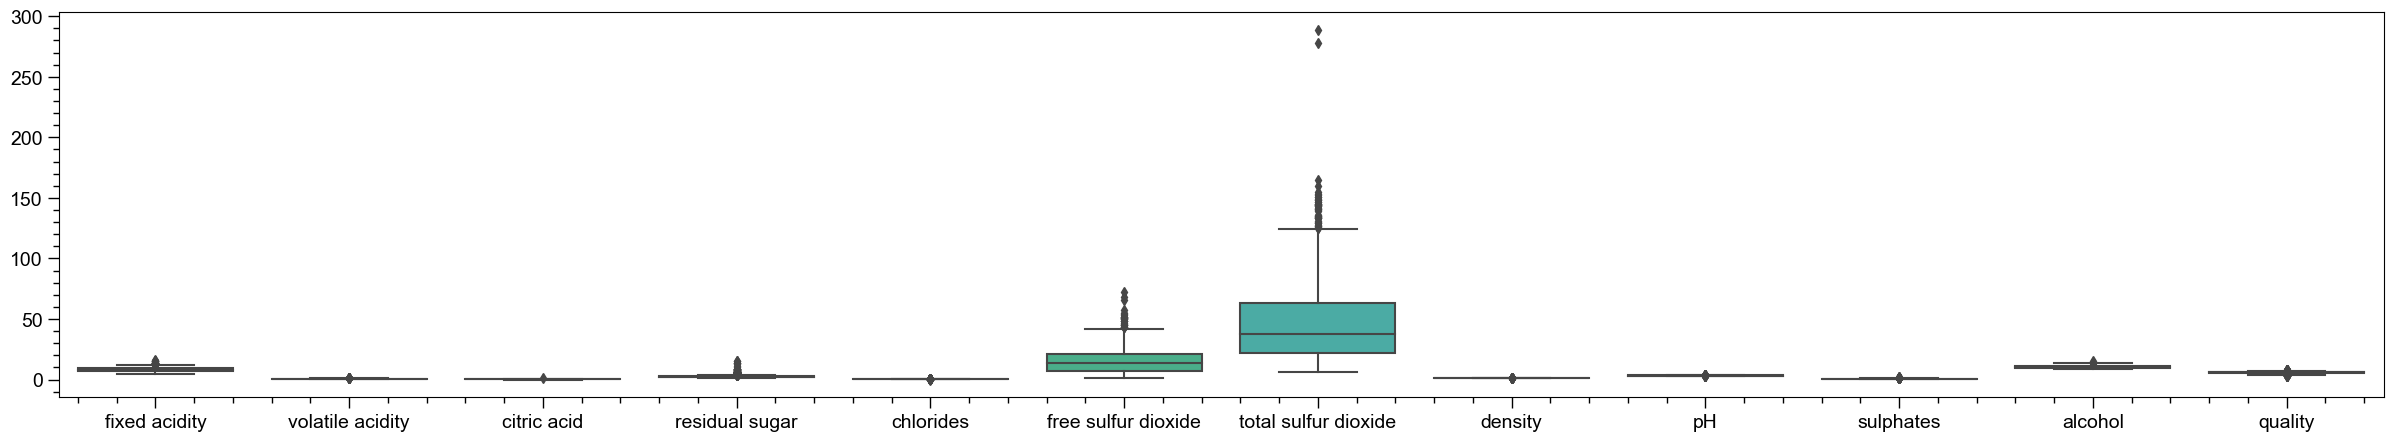

In [13]:
#2: Inspect the data for outliers.
# We can use a boxplot to see if there are any outliers
# Use a large figure

plt.figure(figsize=(30,5))
sns.boxplot(data=df)
plt.show()


In [14]:
# Justify your decisions

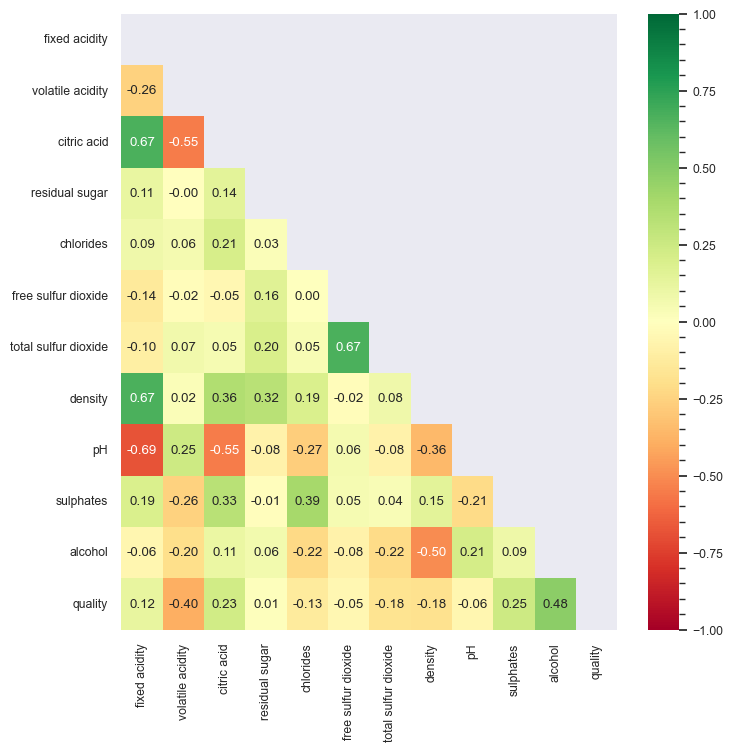

In [15]:
#3: Which features are most correlated with quality?
# Use a heatmap to see the correlation between all columns
# Remove one half of the heatmap to make it easier to read

plt.figure(figsize=(8,8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
# The highest values should be green and the lowest values should be red
# https://stackoverflow.com/questions/34706845/change-xticklabels-fontsize-of-seaborn-heatmap
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='RdYlGn', fmt='.2f', vmin=-1, vmax=1)
plt.show()

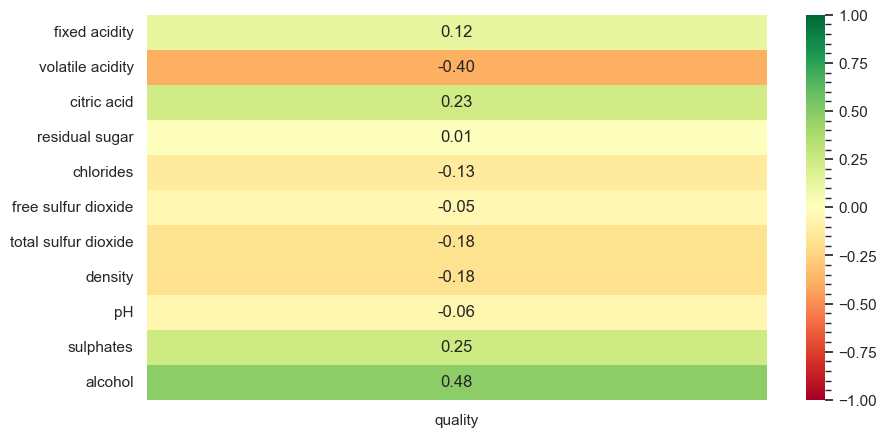

In [16]:
# Repeat the above for only the df.quality column
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
# Set colorbar between -1 and 1
sns.heatmap(df.corr()[['quality']][:-1], vmin=-1, vmax=1, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

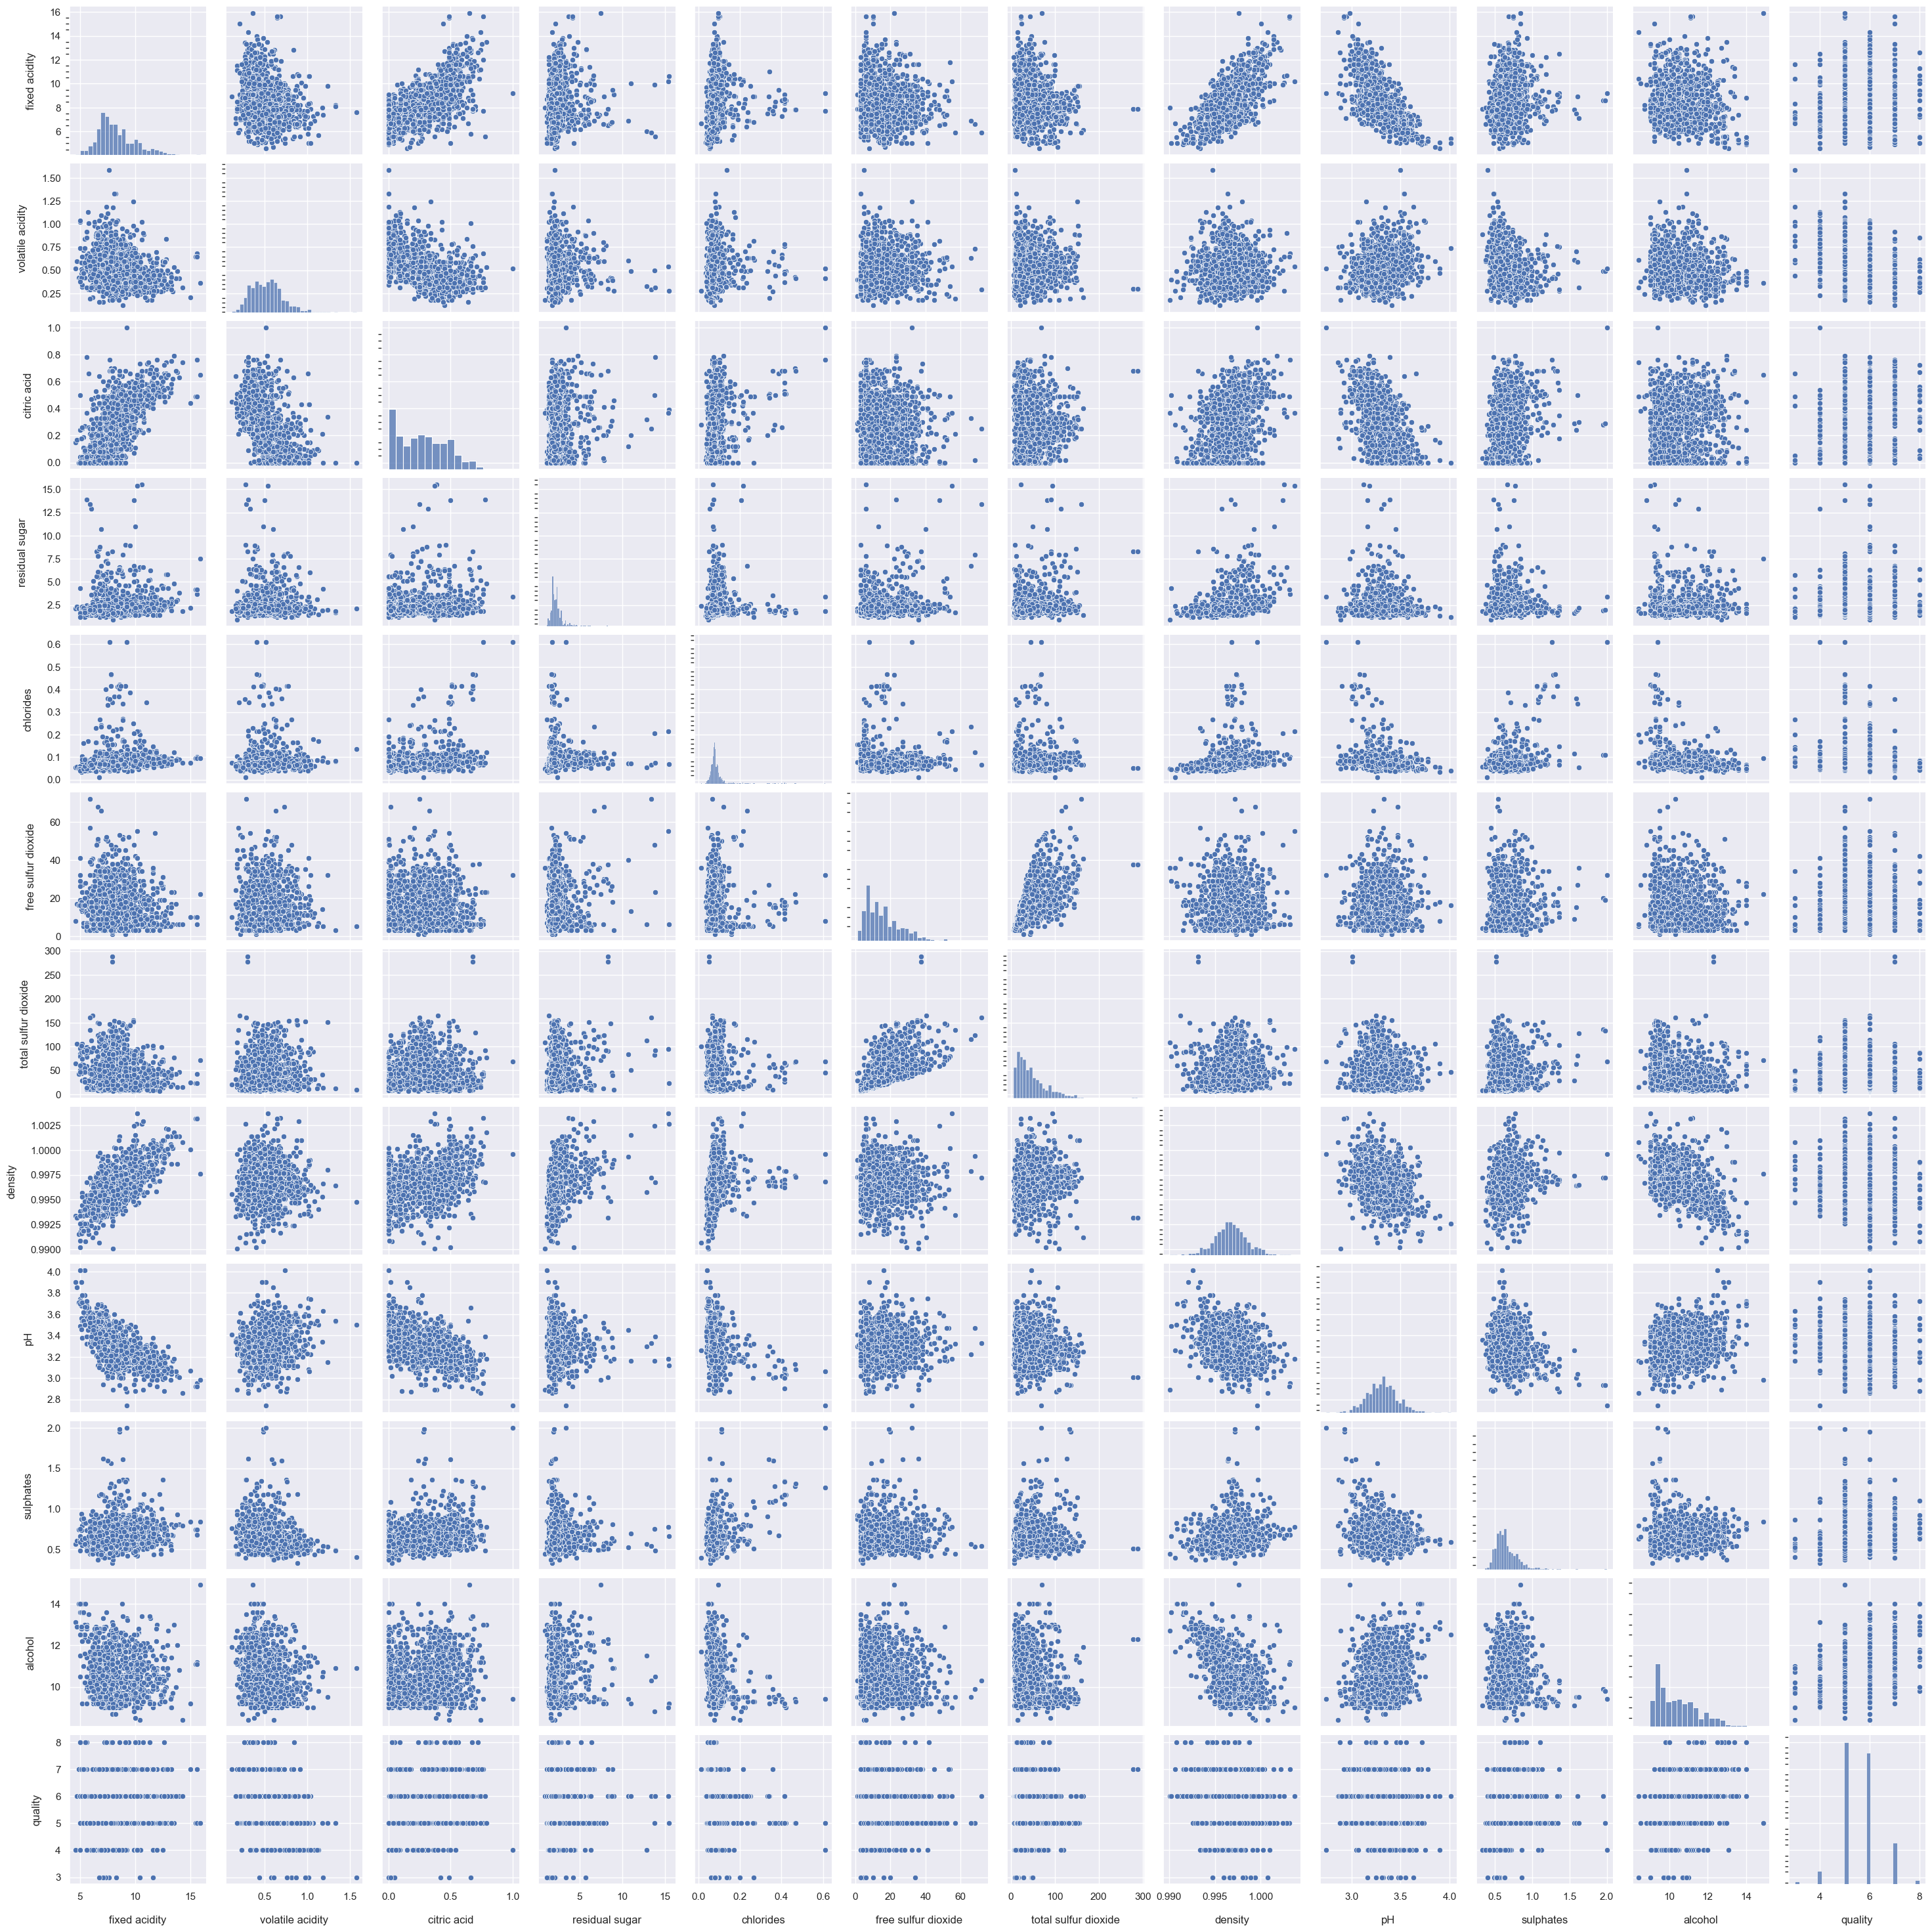

In [17]:
# 4: What is the distribution of each feature?
sns.pairplot(df);  # This takes a long time to run
# You may be better off using pairplot *only* on the columns that you are actually interested in, as below.

In [18]:
# Let's get back to the matplotlib style...
import matplotlib
matplotlib.rc_file_defaults()

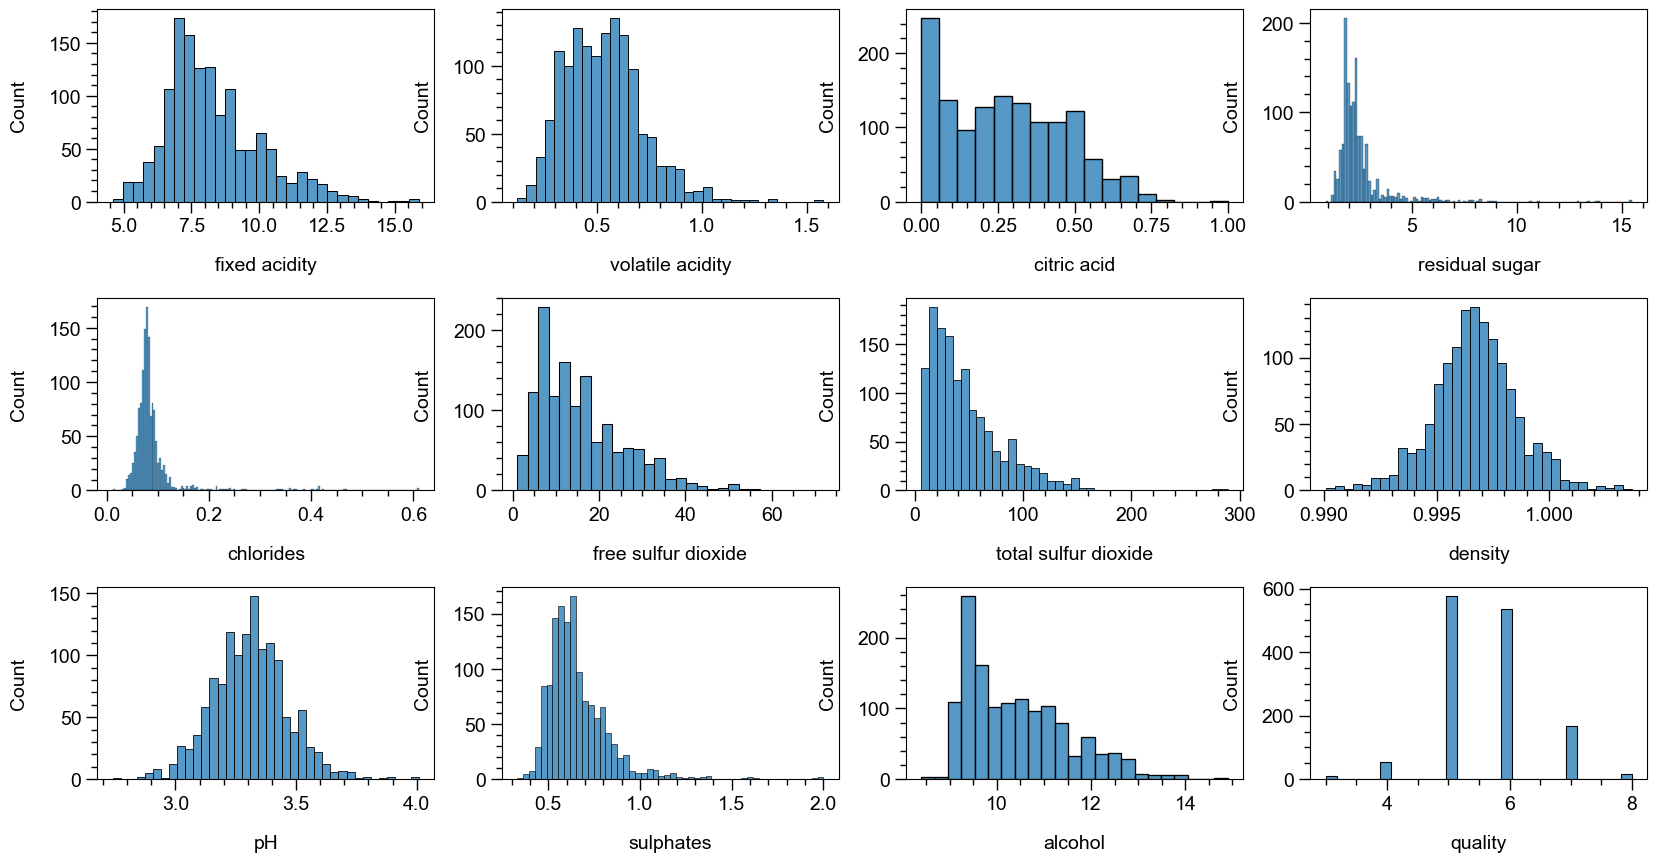

In [19]:
# 4: What is the distribution of each feature? 

# Use a histogram to see the distribution of each feature
# Use a 3x4 grid
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
# Loop through each column
for i, col in enumerate(df.columns):
    # Plot the histogram
    sns.histplot(df[col], ax=axes[i//4, i%4])
    #plt.hist(df[col], ax=axes[i//4, i%4])
    #
    axes[i//4, i%4].set_xlabel(col)
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)
plt.show()

In [21]:
# How might this affect the results of a model?

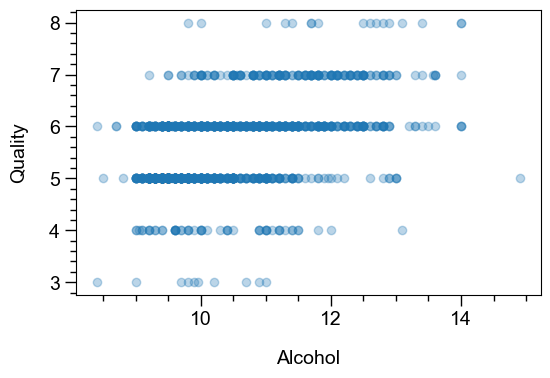

In [22]:
plt.plot(df['alcohol'], df['quality'], 'o', alpha=0.3) # Add alpha
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.axis('on')
plt.show()
# We can see that there is a positive correlation between alcohol and quality

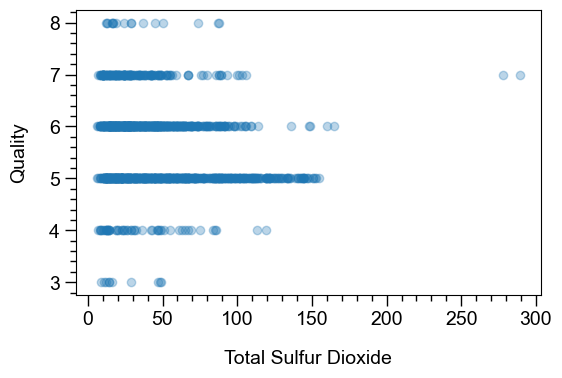

In [23]:
plt.plot(df['total sulfur dioxide'], df['quality'], 'o', alpha=0.3)
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Quality')
plt.show()
# We probably want to remove these ouliers?
# There does not seem to be a correlation between total sulfur dioxide and quality

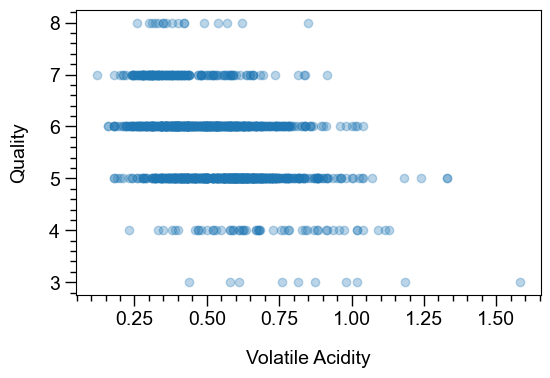

In [24]:
plt.plot(df['volatile acidity'], df['quality'], 'o', alpha=0.3)
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()
# We can see that there is a negative correlation between volatile acidity and quality

## Activity: Build a linear model and interpret the outputs

Build a model that predicts the quality of wine based off any features you would like.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = df[['volatile acidity','total sulfur dioxide','alcohol']]
y = df.quality

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lr = LinearRegression()
# Train the model
lr.fit(X_train, y_train)


LinearRegression()

In [27]:
lr.intercept_

3.3540669188847527

In [28]:
# Interpretation: If all predictors are set to 0, the wine quality is 3.3
# The default wine quality is 3.3

In [29]:
feature_df = pd.DataFrame(lr.coef_, index=X_train.columns)
feature_df

,0
volatile acidity,-1.314708
total sulfur dioxide,-0.002113
alcohol,0.294701


In [30]:
# For every unit increase in volatile acidity, the wine quality decreases by 1.3
# For every unit increase in total sulfur dioxide, the wine quality decreases by 0.0002. Virtually no effect!
# For every unit increase in alcohol, the wine quality increases by 0.3

In [31]:
feature_df

,0
volatile acidity,-1.314708
total sulfur dioxide,-0.002113
alcohol,0.294701


In [32]:
import importlib
importlib.reload(matplotlib) # Reload matplotlib to prevent seaborn style from being applied
importlib.reload(matplotlib.pyplot)

<module 'matplotlib.pyplot' from 'C:\\Users\\renju\\anaconda3\\envs\\multiverse\\lib\\site-packages\\matplotlib\\pyplot.py'>

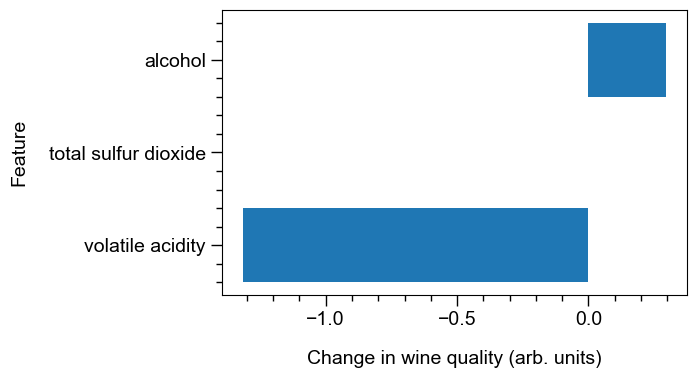

In [33]:
#feature_df.plot(kind='barh')

# Plot a horizontal bar chart with plt.barh()
plt.figure()
plt.barh(feature_df.index, feature_df[0])
plt.xlabel('Change in wine quality (arb. units)')
plt.ylabel('Feature')
# plt.title('Change in wine quality for every unit increase in feature')
plt.show()

## Activity: Assess the model 

How good is our model? Use the metrics shown in Activate to evaluate the model, and interpret the outputs. Can you improve the model by changing some of the features?


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
# R^2 is given by lr.score(); R^2 is the proportion of variance in y that can be explained by X
print(f'Training score: {lr.score(X_train, y_train):.2f}')
print(f'Testing score: {lr.score(X_test, y_test):.2f}')

Training score: 0.31
Testing score: 0.38


In [36]:
# Interpretation: The model explains 30% to 40% of the variance in wine quality

In [37]:
preds = lr.predict(X_test)

In [38]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, preds)
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, preds))

# Print the errors using f-strings and 3 decimal places
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.51
RMSE: 0.66


In [39]:
# Interpretation: On average, the model is off by 0.5 points.
# (Off by an average of of 0.51 (MAE) or 0.66 (RMSE)) 

### Statsmodels

So far we have only been using the sci-kit learn (sklearn) library for building models, but there does exist another -- statsmodels. While these models have a different syntax, they build the same models but provide a different output.

The statsmodels approach is particularly good if you want to conduct a hypothesis test on how much influence a predictor has on a target.

For example, let's say we wanted to investigate if the amount of alcohol present in wine has a significant effect on its quality. We can set the following hypotheses at the 5% level:<br>

$H_0$: Alcohol level has no effect on wine quality<br>
$H_1$: Alcohol level does have an effect on wine quality

In [40]:
import statsmodels.api as sm

In [41]:
X = df[['total sulfur dioxide', 'alcohol', 'volatile acidity']]
y = df.quality

model = sm.OLS(y, X, hasconst=True) 
res = model.fit()
X_with_constant = sm.add_constant(X)
X_with_constant.head(1)

model = sm.OLS(y, X_with_constant, hasconst=True) 

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          7.83e-117
Time:                        07:25:30   Log-Likelihood:                -1393.1
No. Observations:                1359   AIC:                             2794.
Df Residuals:                    1355   BIC:                             2815.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.2311      0.209     15.474      0.000       2.821       3.641
total sulfur dioxide    -0.0017      0.001     -2.961      0.003      -0.003      -0.001
alcohol                  0.3077      0.018     17.414      0.000       0.273       0.342
volatile acidity        -1.3967      0.102    -13.666      0.000      -1.597      -1.196
==============================================================================
Omnibus:                       22.905   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.845
Skew:                          -0.154   Prob(JB):                     2.71e-08
Kurtosis:                       3.721   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol',]]
y = df.quality

model = sm.OLS(y, X, hasconst=True) 
res = model.fit()
X_with_constant = sm.add_constant(X)
X_with_constant.head(1)

model = sm.OLS(y, X_with_constant, hasconst=True) 

res = model.fit()
res.summary()
# We can determine from this which features are significant. 
# Significant: volatile acidity, chlorides, total sulfur dioxide, pH, sulphates, alcohol

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     70.02
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          5.83e-124
Time:                        07:25:30   Log-Likelihood:                -1356.8
No. Observations:                1359   AIC:                             2738.
Df Residuals:                    1347   BIC:                             2800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2379     23.522      0.563      0.574     -32.906      59.381
fixed acidity            0.0126      0.029      0.434      0.664      -0.044       0.069
volatile acidity        -1.1204      0.130     -8.593      0.000      -1.376      -0.865
citric acid             -0.1642      0.162     -1.015      0.310      -0.482       0.153
residual sugar           0.0071      0.017      0.419      0.675      -0.026       0.040
chlorides               -1.9303      0.448     -4.304      0.000      -2.810      -1.050
free sulfur dioxide      0.0033      0.002      1.397      0.163      -0.001       0.008
total sulfur dioxide    -0.0027      0.001     -3.394      0.001      -0.004      -0.001
density                 -8.9904     24.002     -0.375      0.708     -56.075      38.094
pH                      -0.4585      0.213     -2.155      0.031      -0.876      -0.041
sulphates                0.9147      0.127      7.202      0.000       0.666       1.164
alcohol                  0.2895      0.029      9.876      0.000       0.232       0.347
==============================================================================
Omnibus:                       26.019   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                          -0.203   Prob(JB):                     8.77e-09
Kurtosis:                       3.701   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A couple of things to look out for: 
<ol>
    <li> Notice that y and X are the other way round to what we had before. </li>
    <li> We have also had to add the argument 'hasconst=True' to indicate that the model should add a constant value (intercept)- the value the model will predict if our predictor is 0.</li>
</ol>

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     70.02
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          5.83e-124
Time:                        07:25:30   Log-Likelihood:                -1356.8
No. Observations:                1359   AIC:                             2738.
Df Residuals:                    1347   BIC:                             2800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2379     23.522      0.563      0.574     -32.906      59.381
fixed acidity            0.0126      0.029      0.434      0.664      -0.044       0.069
volatile acidity        -1.1204      0.130     -8.593      0.000      -1.376      -0.865
citric acid             -0.1642      0.162     -1.015      0.310      -0.482       0.153
residual sugar           0.0071      0.017      0.419      0.675      -0.026       0.040
chlorides               -1.9303      0.448     -4.304      0.000      -2.810      -1.050
free sulfur dioxide      0.0033      0.002      1.397      0.163      -0.001       0.008
total sulfur dioxide    -0.0027      0.001     -3.394      0.001      -0.004      -0.001
density                 -8.9904     24.002     -0.375      0.708     -56.075      38.094
pH                      -0.4585      0.213     -2.155      0.031      -0.876      -0.041
sulphates                0.9147      0.127      7.202      0.000       0.666       1.164
alcohol                  0.2895      0.029      9.876      0.000       0.232       0.347
==============================================================================
Omnibus:                       26.019   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                          -0.203   Prob(JB):                     8.77e-09
Kurtosis:                       3.701   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statsmodels output gives us some very useful results. For example, the R-squared at the top shows that 23% of the variance in wine quality is explained by this model. 

We can also see the intercept and coefficients in the second table. In this model, if there is no alcohol the quality prediction would be 1.8. For every 1 unit increase in alcohol we would see the prediction increase by 0.366.

The hypothesis test result is under <b> P>|t|</b>, which is the p-value for that factor. In this case it is so small it has been rounded to 0, meaning we can reject the null hypothesis and state that alcohol level does have a significant effect on wine quality.

There are some other important results which you can read about <a href='https://datatofish.com/statsmodels-linear-regression/'>here</a>.

In [44]:
# Investigate the statsmodels approach with the data you chose for the previous model

## Cross-validation (Stretch)

In Activate you were introduced to train test split as a method of checking if your model is fitting correctly to the data. It is a useful test to conduct, but it isn't the only method — there is also cross-validation.

With cross-validation the data is split into chunks (usually 5) of roughly even size. 

<table style="width:80%">
    <tr style="border-left:2px">
        <th style="text-align:center;background-color: #64abff">1</th>
        <th style="text-align:center;background-color: #64abff">2</th>
        <th style="text-align:center;background-color: #64abff">3</th>
        <th style="text-align:center;background-color: #64abff">4</th>
        <th style="text-align:center;background-color: #64abff">5</th>
    </tr>
</table>
    
From here a model is built with 4 of the chunks, and then an r-squared score is calculated using the 5th as a testing set:

<table style="width:80%">
    <tr style="border-left:2px">
        <th style="text-align:center;background-color: #64abff">1</th>
        <th style="text-align:center;background-color: #64abff">2</th>
        <th style="text-align:center;background-color: #64abff">3</th>
        <th style="text-align:center;background-color: #64abff">4</th>
        <th style="text-align:center;background-color: #ff7c66">5</th>
    </tr>
</table>

This process is then repeated, with each chunk being used as a testing set once.

<table style="width:80%">
    <tr style="border-left:2px">
        <th style="text-align:center;background-color: #64abff">1</th>
        <th style="text-align:center;background-color: #64abff">2</th>
        <th style="text-align:center;background-color: #64abff">3</th>
        <th style="text-align:center;background-color: #ff7c66">4</th>
        <th style="text-align:center;background-color: #64abff">5</th>
    </tr>
    <tr style="border-left:2px">
        <th style="text-align:center;background-color: #64abff">1</th>
        <th style="text-align:center;background-color: #64abff">2</th>
        <th style="text-align:center;background-color: #ff7c66">3</th>
        <th style="text-align:center;background-color: #64abff">4</th>
        <th style="text-align:center;background-color: #64abff">5</th>
    </tr>
    <tr style="border-left:2px">
        <th style="text-align:center;background-color: #64abff">1</th>
        <th style="text-align:center;background-color: #ff7c66">2</th>
        <th style="text-align:center;background-color: #64abff">3</th>
        <th style="text-align:center;background-color: #64abff">4</th>
        <th style="text-align:center;background-color: #64abff">5</th>
    </tr>
    <tr style="border-left:2px">
        <th style="text-align:center;background-color: #ff7c66">1</th>
        <th style="text-align:center;background-color: #64abff">2</th>
        <th style="text-align:center;background-color: #64abff">3</th>
        <th style="text-align:center;background-color: #64abff">4</th>
        <th style="text-align:center;background-color: #64abff">5</th>
    </tr>
</table>

Each time this process runs a new r-squared score is produced, and so to get an overall summary we find the mean of these scores. Cross-validation is essentially train_test_split except it is run 5 times with a different 20% used as the testing set each time. By comparing the individual scores we can also see if the model is over or under fitting (if all scores are similar then the model is fitting appropriately).

This process is not intended to replace train_test_split, but is often used in conjunction as an additional test to evaluate our models.

Let's have a go with this process. We import the function from the model_selection library of sklearn, and the inputs are the model we are using, the predictor matrix, the target series and how many 'chunks' we want):

In [45]:
X=df[['alcohol']]
y=df.quality

import statsmodels.api as sm
X = sm.add_constant(df[['alcohol']])
model= sm.OLS(y, X, hasconst=True) 

res=model.fit()

In [46]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(lr, X, y, cv=5)

# Check the individual r-squared scores:

print(cross_val)

[0.11464572 0.20628106 0.22287558 0.25557999 0.07717081]


We can see that between 7% and 25.6% of the variance in wine quality can be explained by this model.

In [47]:
cross_val.mean()

0.17531063142489856

As an average we can see then that 17.5% of the variance in wine quality scores can be explained by this model.

In [48]:
# Try using cross-validation with the model you built earlier.

## Activity

Car owners now have plenty of options for selling their car with one option being an online market place. 

Explore the data below (cleaning where necessary) and build a model that predicts sell price. Create new features if you feel this is appropriate. Once you have a model you are satisfied with, write a report that explains to a non-technical stakeholders (e.g. customer) how the model works and how reliable it is.      

<a href='https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho'>Documentation.</a> This dataset is from 2020.

In [49]:
### Note from Renju
### This data is from CarDekho.com, a car listing website in India.
### Therefore the data is in Indian Rupees (INR) 

In [50]:
cars = pd.read_csv('car_details.csv')
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [51]:
cars.selling_price.max()

8900000

In [52]:
cars.shape

(4340, 8)

In [53]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [54]:
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [55]:
cars.duplicated().sum()

763

In [56]:
cars = cars.drop_duplicates()

In [57]:
# Make a single boxplot for the following column: 'year'
# Label the y-axis 'Year'
sns.boxplot(data=cars, y='year')

<AxesSubplot:ylabel='year'>

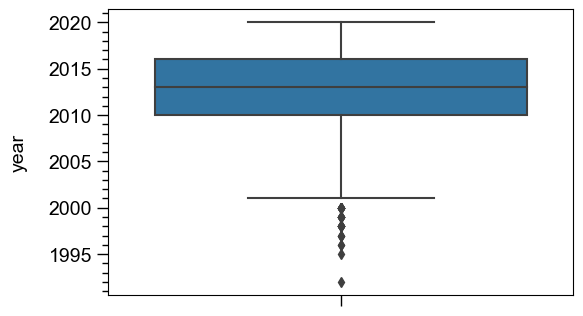

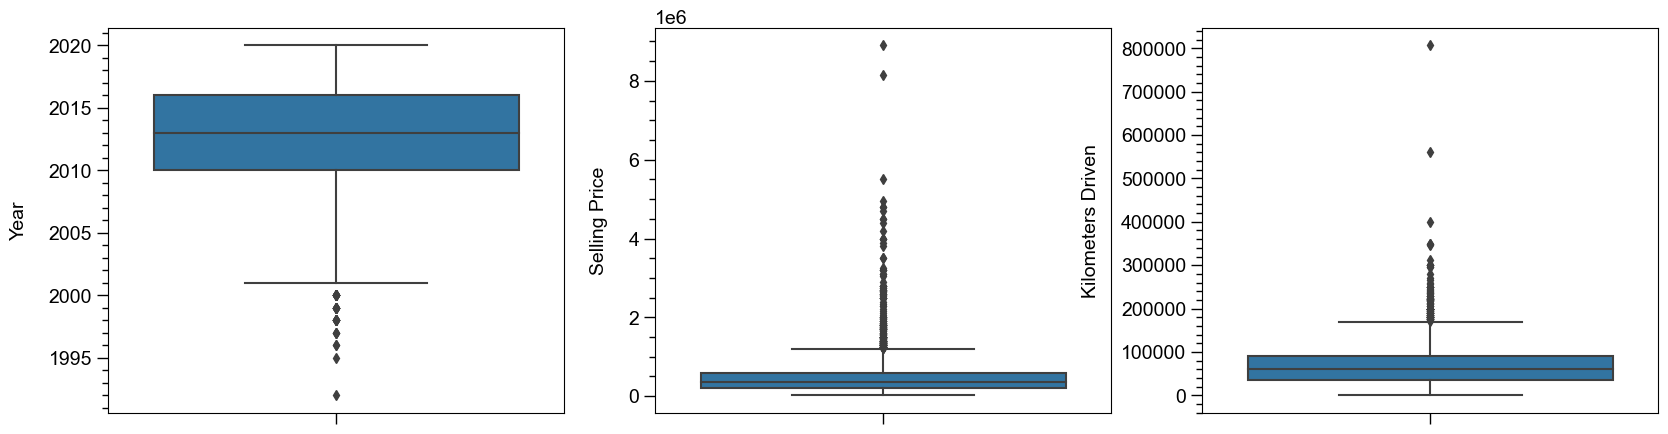

In [58]:
# Make three separate boxplots from the data
# Make one boxplot for each of the following columns: 'year', 'selling_price', 'km_driven'
# Use a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# Plot the boxplots
sns.boxplot(data=cars, y = 'year', ax=axes[0])
sns.boxplot(data=cars, y = 'selling_price', ax=axes[1])
sns.boxplot(data=cars, y = 'km_driven', ax=axes[2])
# Label the y-axes
axes[0].set_ylabel('Year')
axes[1].set_ylabel('Selling Price')
axes[2].set_ylabel('Kilometers Driven')
plt.show()


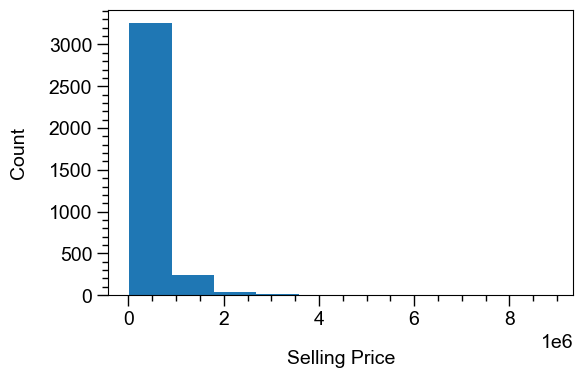

In [59]:
plt.hist(cars.selling_price)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

There are significant outliers which are heavily skewing the data (which will affect results). Combining this with the fact most owners won't be selling cars >1500000, we should remove anything bigger.

In [60]:
# There are significant outliers which are heavily skewing the data (which will affect results). Combining this with the fact most owners won't be selling cars >1500000, we should remove anything bigger.
# Remove all rows where the selling price is greater than 1500000
cars = cars[cars.selling_price < 1_500_000]

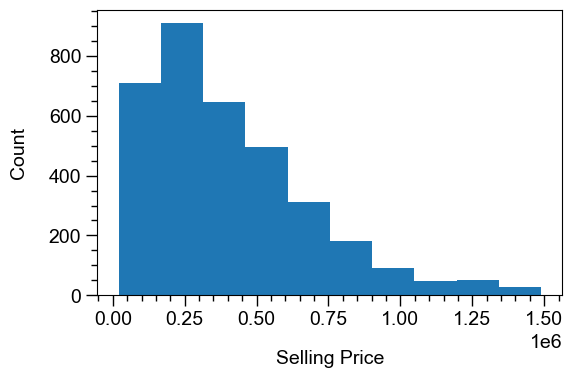

In [61]:
plt.hist(cars.selling_price)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

In [62]:
cars.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [63]:
cars.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3469,3469.000000,3.469000e+03,3469.000000,3469,3469,3469,3469
unique,1422,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,54,NaN,NaN,NaN,1706,2767,3245,2123
mean,NaN,2012.861632,4.087150e+05,69897.931681,NaN,NaN,NaN,NaN
std,NaN,4.258230,2.806221e+05,47734.261003,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,2.000000e+05,38000.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,3.450000e+05,62668.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,5.500000e+05,90000.000000,NaN,NaN,NaN,NaN


In [64]:
cars.owner.value_counts()

First Owner             2123
Second Owner             967
Third Owner              287
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

In [65]:
# Due to class imbalanace it makes sense to differentiate between first owner and not, instead of dummies

In [66]:
cars['second_hand'] = cars.owner.apply(lambda x: True if x!='First Owner' else False)
# This means that if the owner is not 'First Owner', then the value is True. Otherwise, it is False.

In [67]:
# The above is equivalent to:
# cars['second_hand'] = cars.owner != 'First Owner'
# Let's prove this.

test1 = cars.owner.apply(lambda x: True if x!='First Owner' else False)
test2 = (cars.owner != 'First Owner')
# Check that test1 and test2 are the same
test1.equals(test2)

True

In [68]:
# %timeit cars.owner.apply(lambda x: True if x!='First Owner' else False) # 329 µs
# %timeit cars.owner != 'First Owner' # 131 µs

In [69]:
cars.seller_type.value_counts()

Individual          2767
Dealer               671
Trustmark Dealer      31
Name: seller_type, dtype: int64

In [70]:
#cars['seller_individual'] = cars.seller_type.apply(lambda x: True if x=='Individual' else False) 
# The above is equivalent to:
cars['seller_individual'] = cars.seller_type == 'Individual'  # Avoid using apply() where possible

In [71]:
cars.fuel.value_counts()
# CNG, LPG and Electric won't make much impact on our model due to low numbers so will group as 'other'

Diesel      1706
Petrol      1703
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

In [72]:
# If the fuel type is CNG, LPG or Electric, then the value is 'Other'. Otherwise, it is the original value.
cars['fuel'] = cars.fuel.apply(lambda x: 'Other' if x in ['CNG', 'LPG', 'Electric'] else x)

In [73]:
cars.transmission.value_counts()

Manual       3245
Automatic     224
Name: transmission, dtype: int64

In [74]:
# Get dummies for transmission
cars_dummy = pd.get_dummies(cars, columns=['fuel','transmission']) # Consider using drop_first=True

In [75]:
cars_dummy

,name,year,selling_price,km_driven,seller_type,owner,second_hand,seller_individual,fuel_Diesel,fuel_Other,fuel_Petrol,transmission_Automatic,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,Individual,First Owner,False,True,0,0,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,First Owner,False,True,0,0,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,First Owner,False,True,1,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,Individual,First Owner,False,True,0,0,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Second Owner,True,True,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Individual,Second Owner,True,True,1,0,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Individual,Second Owner,True,True,1,0,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,Individual,Second Owner,True,True,0,0,1,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Individual,First Owner,False,True,1,0,0,0,1


In [76]:
cars_dummy

,name,year,selling_price,km_driven,seller_type,owner,second_hand,seller_individual,fuel_Diesel,fuel_Other,fuel_Petrol,transmission_Automatic,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,Individual,First Owner,False,True,0,0,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,First Owner,False,True,0,0,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,First Owner,False,True,1,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,Individual,First Owner,False,True,0,0,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Second Owner,True,True,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Individual,Second Owner,True,True,1,0,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Individual,Second Owner,True,True,1,0,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,Individual,Second Owner,True,True,0,0,1,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Individual,First Owner,False,True,1,0,0,0,1


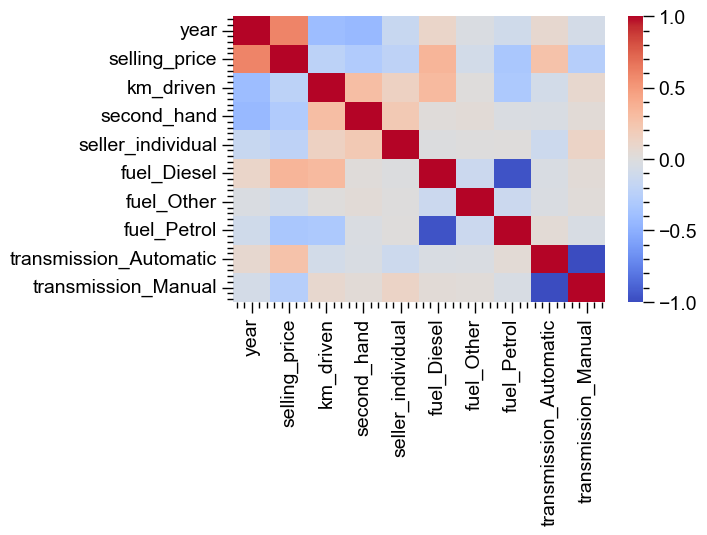

In [77]:
# Plot a heatmap of the correlation matrix, with limits -1 to 1
sns.heatmap(cars_dummy.corr(), vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [78]:
cars_dummy.corr()['selling_price'].sort_values(ascending=True)

fuel_Petrol              -0.329005
second_hand              -0.291256
transmission_Manual      -0.259622
km_driven                -0.224663
seller_individual        -0.213707
fuel_Other               -0.081373
transmission_Automatic    0.259622
fuel_Diesel               0.350216
year                      0.600189
selling_price             1.000000
Name: selling_price, dtype: float64

In [79]:
carsX = cars_dummy[['km_driven', 'second_hand', 'fuel_Diesel', 'fuel_Petrol', 'transmission_Manual']]
carsY = cars_dummy['selling_price']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(carsX, carsY, test_size=0.2, random_state=42)

carlm = LinearRegression()
carlm.fit(X_train, y_train)

LinearRegression()

In [81]:
cross_val = cross_val_score(carlm, carsX, carsY, cv=5)
preds = carlm.predict(X_test)
print('Train R-squared:', carlm.score(X_train, y_train))
print('Test R-squared:', carlm.score(X_test, y_test))
print('Cross-validated R-squared:', cross_val.mean())
print('Mean Absolute Error:', mean_absolute_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))

Train R-squared: 0.3418630696516761
Test R-squared: 0.36532572038284505
Cross-validated R-squared: 0.33925969675613993
Mean Absolute Error: 168018.20946511647
Root Mean Squared Error: 225896.48938325455


In [82]:
# The metrics suggest that about 34% of the variance in selling price can be explained by the model. 
# Not a huge amount, but considering that much of car sales comes by bartering this isn't too unexpected. 

# The error metrics suggest that the model is off by about 200,000 on average, which is a lot for a car.
# Until you realize that this is all done in rupees! So we're only off by about 2,500 USD on average.

In [83]:
effect_df = pd.DataFrame({'feature': carsX.columns, 'effect': carlm.coef_})

In [84]:
effect_df.sort_values('effect', ascending=True)

,feature,effect
4,transmission_Manual,-262086.739868
1,second_hand,-123857.238174
3,fuel_Petrol,-4269.459528
0,km_driven,-1.783059
2,fuel_Diesel,252466.654262


In [85]:
effect_df.sort_values('effect', ascending=True).plot(kind='barh', x='feature', y='effect', legend=False, figsize=(10, 5));


The factors that affect sale price the most are the fuel type and transmission. 

This model adds over 250,000 rupees on the predicted selling price of a car which uses diesel, but provides nearly no adjustment for petrol. 

A manual transmission loses 260,000 rupees off its predicted sale price (showing that automatic cars will sell for more).

For every 1 km driven, the predicted price goes down by 1.80 rupees.

In [86]:
# You may want to try this with statsmodels to get a more detailed summary of the model

# X = cars_dummy[['km_driven','fuel_Diesel','fuel_Petrol','transmission_Manual']]
# y = cars.selling_price
# model = sm.OLS(y, X.astype(float), hasconst=True) 

# res = model.fit()
# print(res.summary())